## Introduction

The [Bank Credit Evaluation dataset](https://www.kaggle.com/datasets/heinereugene/credit-evaluation) is a valuable resource for credit risk analysis and modeling within the banking context. This dataset is particularly relevant for financial institutions aiming to assess the creditworthiness of loan applicants.

The central focus of this dataset is the 'TARGET' variable, which serves as a binary indicator of whether an individual encountered difficulties in repaying their credit. A '1' in this column signifies credit repayment difficulty, while a '0' indicates no such difficulty.

Beyond the 'TARGET' variable, the dataset encompasses a range of informative features:

1.  `id`: An identification number unique to each individual.
2.  `CNT_CHILDREN`: The number of children associated with the individual.
3.  `AMT_INCOME_TOTAL`: The total income of the individual.
4.  `AMT_CREDIT`: The amount of credit requested by the individual.
5.  `AMT_ANNUITY`: The annuity (regular payment) associated with the loan.
6.  `AMT_GOODS_PRICE`: The price of the goods for which the loan is intended.
7.  `REGION_POPULATION_RELATIVE`: A measure of the relative population density of the individual's region.
8.  `DAYS_BIRTH`: The age of the individual in days, with a negative value indicating the number of days before the current date of birth.
9.  `DAYS_EMPLOYED`: The number of days the individual has been employed, with a negative value indicating the duration before the current employment period.
10. `DAYS_REGISTRATION`: The number of days between the individual's registration and the current application date.
11. `DAYS_ID_PUBLISH`: The number of days since the individual published their ID.
12. `FLAG_WORK_PHONE`: A binary flag indicating whether the individual possesses a work phone, with `1` representing affirmative and `0` indicating negative.
13. `REGION_RATING_CLIENT`: The client's region rating.
14. `HOUR_APPR_PROCESS_START`: The hour of the day when the loan application process commenced.

In this analysis, we will delve into the Bank Credit Evaluation dataset, conducting exploratory data analysis (EDA) to gain a deeper understanding of the data's distribution, identifying potential outliers or anomalies, and extracting insights that can be instrumental in constructing credit risk models and facilitating informed lending decisions within the banking sector.

## Initial Setup

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('credit-evaluation.csv')

# Drop useless column
df = df.drop(['id'], axis=1)

df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648,-2120,0,2,10
1,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573,-1827,0,3,9
2,0,1,112500.0,327024.0,23827.5,270000.0,0.019101,-15948,-1234,-5782,-3153,0,2,10
3,0,0,121500.0,454500.0,15151.5,454500.0,0.030755,-21077,-1288,-5474,-4270,0,2,10
4,0,0,99000.0,247275.0,17338.5,225000.0,0.006207,-23920,365243,-9817,-4969,0,2,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TARGET                      20000 non-null  int64  
 1   CNT_CHILDREN                20000 non-null  int64  
 2   AMT_INCOME_TOTAL            20000 non-null  float64
 3   AMT_CREDIT                  20000 non-null  float64
 4   AMT_ANNUITY                 20000 non-null  float64
 5   AMT_GOODS_PRICE             19986 non-null  float64
 6   REGION_POPULATION_RELATIVE  20000 non-null  float64
 7   DAYS_BIRTH                  20000 non-null  int64  
 8   DAYS_EMPLOYED               20000 non-null  int64  
 9   DAYS_REGISTRATION           20000 non-null  int64  
 10  DAYS_ID_PUBLISH             20000 non-null  int64  
 11  FLAG_WORK_PHONE             20000 non-null  int64  
 12  REGION_RATING_CLIENT        20000 non-null  int64  
 13  HOUR_APPR_PROCESS_START     200

## Vaues review

In [ ]:
# Numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ranges for numeric columns
ranges = pd.DataFrame(index=numeric_cols, columns=['Min', 'Max', 'Mean', 'Std'])
for col in numeric_cols:
    ranges.loc[col, 'Min'] = df[col].min()
    ranges.loc[col, 'Max'] = df[col].max()
    ranges.loc[col, 'Mean'] = df[col].mean()
    ranges.loc[col, 'Std'] = df[col].std()

# Display the ranges
ranges

,Min,Max,Mean,Std
TARGET,0,1,0.17895,0.38332
CNT_CHILDREN,0,11,0.43355,0.737843
AMT_INCOME_TOTAL,25650.0,117000000.0,173547.463151,831902.380595
AMT_CREDIT,45000.0,4050000.0,594559.6029,397624.313863
AMT_ANNUITY,2052.0,258025.5,27050.755725,14530.344084
AMT_GOODS_PRICE,45000.0,4050000.0,532560.400105,364968.41184
REGION_POPULATION_RELATIVE,0.000533,0.072508,0.020588,0.013573
DAYS_BIRTH,-25166,-7683,-15877.6033,4344.318087
DAYS_EMPLOYED,-17531,365243,59562.8596,137575.974767
DAYS_REGISTRATION,-21249,0,-4934.4389,3501.209694


1.  `TARGET`: Binary variable with values `0` or `1`, indicating repayment difficulties.
2.  `CNT_CHILDREN`: Ranges from `0` to `11`, with an average of around `0.43`.
3.  `AMT_INCOME_TOTAL`: Wide range from `25,650` to `117,000,000`, indicating significant variation in total income.
4.  `AMT_CREDIT`: Credit amounts range from `45,000` to `4,050,000`.
5.  `AMT_ANNUITY`: Annuity amounts range from `2,052` to `258,025.5`.
6.  `AMT_GOODS_PRICE`: Ranges from `45,000` to `4,050`,`000`.
7.  `REGION_POPULATION_RELATIVE`: Varies from `0.000533` to `0.072508`.
8.  `DAYS_BIRTH`: Negative values indicating age, ranging from `-25166` to `-7683` days.
9.  `DAYS_EMPLOYED`: Employment duration from `-17531` to `365243` days, with a high standard deviation.
10. `DAYS_REGISTRATION`: Ranges from `-21249` to `0` days.
11. `DAYS_ID_PUBLISH`: Varies from `-6226` to `0` days.
12. `FLAG_WORK_PHONE`: Binary variable (`0` or `1`) indicating the presence of a work phone.
13. `REGION_RATING_CLIENT`: Ranges from `1` to `3`.
14. `HOUR_APPR_PROCESS_START`: Ranges from `0` to `23` hours.

### Investigating missing values in the dataset

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Creating a DataFrame to display missing data statistics
missing_stats = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

missing_stats

,Missing Values,Percentage (%)
AMT_GOODS_PRICE,14,0.07


### Values distribution

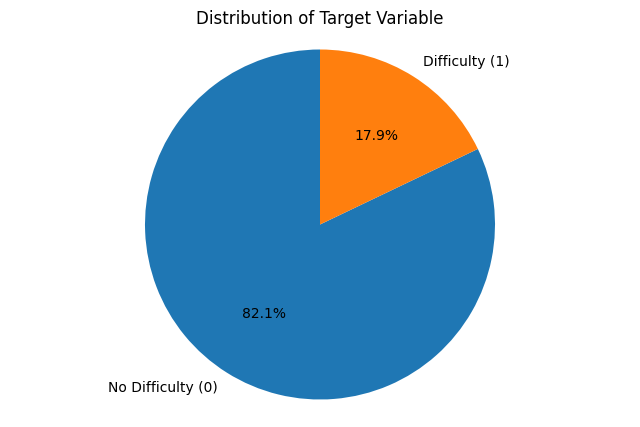

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of the target variable
target_counts = df['TARGET'].value_counts()
target_percentage = (target_counts / len(df)) * 100

# Plotting the distribution of the target variable as a pie chart
plt.figure(figsize=(8, 5))
plt.pie(target_counts, labels=['No Difficulty (0)', 'Difficulty (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Displaying counts and percentage
target_counts, target_percentage
plt.show()

The distribution of the target variable (`TARGET`) indicates a class imbalance:

No Difficulty (0): `16,421` instances (`82.105%`)

Difficulty (1): `3,579` instances (`17.895%`)

This imbalance is crucial to consider when building predictive models, as it might lead to a bias towards the majority class. Techniques such as oversampling the minority class, undersampling the majority class, or using advanced algorithms designed to handle imbalanced data can be employed to mitigate this issue.

## Feature importance analysis


Feature Importances:
                             importance
DAYS_BIRTH                    0.116116
DAYS_ID_PUBLISH               0.114777
DAYS_REGISTRATION             0.110836
AMT_ANNUITY                   0.105573
DAYS_EMPLOYED                 0.103719
AMT_CREDIT                    0.092265
REGION_POPULATION_RELATIVE    0.082817
AMT_INCOME_TOTAL              0.079925
AMT_GOODS_PRICE               0.074125
HOUR_APPR_PROCESS_START       0.067529
CNT_CHILDREN                  0.023640
REGION_RATING_CLIENT          0.016000
FLAG_WORK_PHONE               0.012678


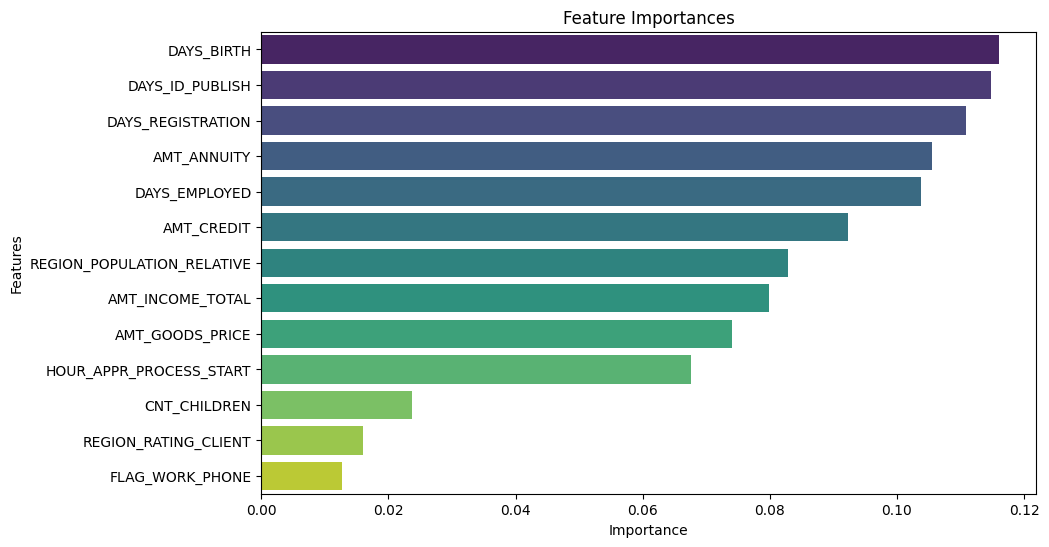

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Handling missing values
imputer = SimpleImputer(strategy='median')
df_imputed = df.copy()
df_imputed[df.columns] = imputer.fit_transform(df)

# Preparing the data
X = df_imputed.drop(['TARGET'], axis=1)
y = df_imputed['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

# Sort the DataFrame by importance in descending order
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)

# Plotting the feature importances as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_sorted['importance'], y=feature_importances_sorted.index, orient='h', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## Correlation Analysis

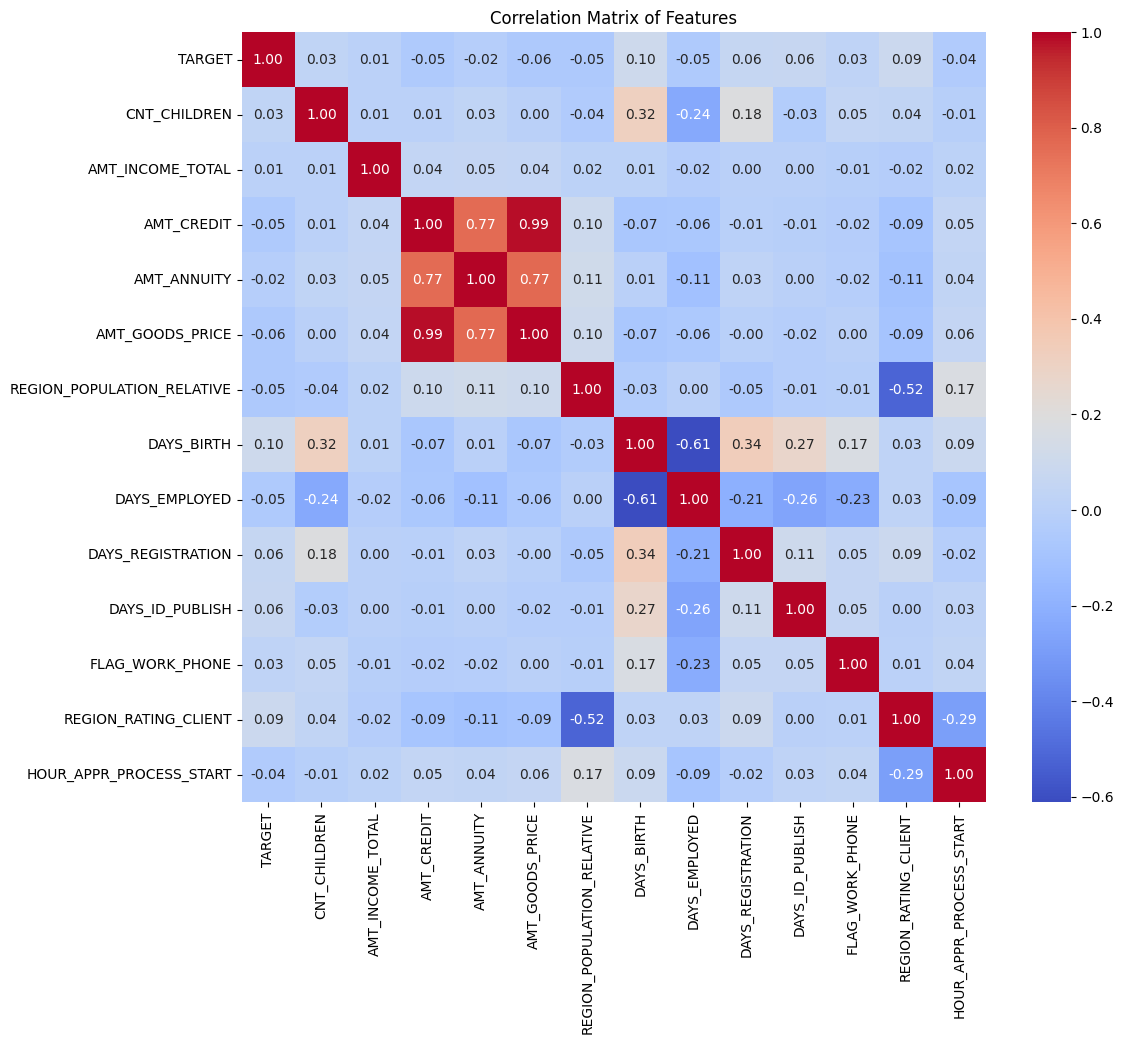

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## What the models would perform best in this dataset?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import xgboost as xgb


# Handilng missing values
imputer = SimpleImputer(strategy='median')
df_imputed = df.copy()
df_imputed[df.columns] = imputer.fit_transform(df)

# Preparing the data
X = df_imputed.drop(['TARGET'], axis=1)
y = df_imputed['TARGET']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models to evaluate
models = [
    ("AdaBoost", AdaBoostClassifier()),
    ("HistGradientBoosting", HistGradientBoostingClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("KNeighbors", KNeighborsClassifier()),
    ("MLPClassifier", MLPClassifier(max_iter=1000)),
    ("SVC", SVC()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("ExtraTree", ExtraTreeClassifier()),
    ("DummyClassifier", DummyClassifier(strategy='stratified')),
    ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluating each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    print("----\n\n")
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results_df = results_df.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['1.0']['precision'],
        'Recall': report['1.0']['recall'],
        'F1-Score': report['1.0']['f1-score']
    }, ignore_index=True)

# Sorting by different metrics
sorted_by_accuracy = results_df.sort_values('Accuracy', ascending=False)
sorted_by_precision = results_df.sort_values('Precision', ascending=False)
sorted_by_recall = results_df.sort_values('Recall', ascending=False)
sorted_by_f1 = results_df.sort_values('F1-Score', ascending=False)

# Displaying the sorted results
print("Sorted by Accuracy:\n", sorted_by_accuracy)
print("\nSorted by Precision:\n", sorted_by_precision)
print("\nSorted by Recall:\n", sorted_by_recall)
print("\nSorted by F1-Score:\n", sorted_by_f1)

AdaBoost
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      4986
         1.0       0.67      0.01      0.02      1014

    accuracy                           0.83      6000
   macro avg       0.75      0.50      0.46      6000
weighted avg       0.80      0.83      0.76      6000

----


HistGradientBoosting
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      4986
         1.0       0.43      0.01      0.02      1014

    accuracy                           0.83      6000
   macro avg       0.63      0.50      0.46      6000
weighted avg       0.76      0.83      0.76      6000

----


RandomForest
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      4986
         1.0       0.55      0.03      0.05      1014

    accuracy                           0.83      6000
   macro avg       0.69      0.51      0.48      6000
weighted avg     

1.  **AdaBoost** has the highest precision but very low recall and F1-score, indicating it is cautious in predicting the positive class (difficulty in repaying credit) but accurate when it does.

2.  **RandomForest** and **HistGradientBoosting** show a good balance between precision and recall, though their recall and F1-scores are not very high. They are relatively accurate overall.

3.  **XGBoost** shows a decent balance across all metrics. It has a better recall and F1-score compared to RandomForest and HistGradientBoosting, making it a potentially good choice for a balanced approach.

4.  **ExtraTree** and **DecisionTree** have higher recall but lower accuracy and precision, suggesting they are more liberal in predicting the positive class but less accurate overall.

5.  **KNeighbors** has moderate performance across all metrics.

6.  **SVC** and **LogisticRegression**, despite having high accuracy, have zero precision, recall, and F1-score, indicating they might be predicting only the majority class.

Considering the class imbalance and the nature of credit risk prediction (where both false positives and false negatives can be costly), **XGBoost** seems to be the best overall model in this context. It strikes a balance between accurately predicting the positive class and not overpredicting it.

Ff avoiding false negatives (failing to identify individuals who will have difficulty repaying) is more critical, a model with higher recall like **ExtraTree** or **DecisionTree** might be preferable, despite their lower overall accuracy.

### Testing models with balanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Balancing the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# List of models to evaluate
models = [
    ("AdaBoost", AdaBoostClassifier()),
    ("HistGradientBoosting", HistGradientBoostingClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("KNeighbors", KNeighborsClassifier()),
    ("MLPClassifier", MLPClassifier(max_iter=1000)),
    ("SVC", SVC()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("ExtraTree", ExtraTreeClassifier()),
    ("DummyClassifier", DummyClassifier(strategy='stratified')),
    ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluating each model
for name, model in models:
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    print("----\n\n")
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results_df = results_df.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['1.0']['precision'],
        'Recall': report['1.0']['recall'],
        'F1-Score': report['1.0']['f1-score']
    }, ignore_index=True)

# Sorting by different metrics
sorted_by_accuracy = results_df.sort_values('Accuracy', ascending=False)
sorted_by_precision = results_df.sort_values('Precision', ascending=False)
sorted_by_recall = results_df.sort_values('Recall', ascending=False)
sorted_by_f1 = results_df.sort_values('F1-Score', ascending=False)

# Displaying the sorted results
print("Sorted by Accuracy:\n", sorted_by_accuracy)
print("\nSorted by Precision:\n", sorted_by_precision)
print("\nSorted by Recall:\n", sorted_by_recall)
print("\nSorted by F1-Score:\n", sorted_by_f1)

AdaBoost
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      4986
         1.0       0.23      0.10      0.14      1014

    accuracy                           0.79      6000
   macro avg       0.54      0.52      0.51      6000
weighted avg       0.73      0.79      0.76      6000

----


HistGradientBoosting
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      4986
         1.0       0.43      0.06      0.10      1014

    accuracy                           0.83      6000
   macro avg       0.64      0.52      0.50      6000
weighted avg       0.77      0.83      0.77      6000

----


RandomForest
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4986
         1.0       0.31      0.06      0.10      1014

    accuracy                           0.82      6000
   macro avg       0.57      0.52      0.50      6000
weighted avg     

Balancing the training dataset has led to some noticeable changes in the model performance metrics:

1.  **Increase in Recall**: Models like MLPClassifier, SVC, and Logistic Regression show a significant increase in recall. This indicates that balancing the data helped these models better identify the positive class (individuals who will have difficulty repaying credit).

2.  **Decrease in Precision for Some Models**: While the recall has increased, precision has decreased for some models. This trade-off is common in imbalanced datasets when balancing techniques are applied.

3.  **Changes in F1-Score**: The F1-Score, which is a balance between precision and recall, has improved for models like Logistic Regression, SVC, and MLPClassifier. These models are now better at handling the positive class, even though their overall accuracy might have dropped.

4.  **Overall Best Performers**:

    -   **HistGradientBoosting** remains a strong performer in terms of accuracy and precision but has lower recall and F1-scores.
    -   **XGBoost** shows a good balance between accuracy and F1-score.
    -   **MLPClassifier**, **SVC**, and **Logistic Regression** have lower accuracy but much higher recall and **F1-scores**, suggesting improved identification of the positive class at the expense of more false positives.

 Balancing techniques like SMOTE can lead to overfitting on the minority class, so it's crucial to thoroughly validate the model's performance, possibly using techniques like cross-validation, to ensure that the improvements are genuine and not just artifacts of overfitting